In [1]:
#Import packages
import pandas as pd
from sklearn.impute import SimpleImputer
import numpy as np
from sklearn.preprocessing import PowerTransformer,StandardScaler
import matplotlib.pyplot as plt
from kmodes.kprototypes import KPrototypes
import seaborn as sns

In [58]:
#Read clean dataset
df=pd.read_excel('Dataset_GMSalary_w_nvar.xlsx')

In [70]:
#Copy of the dataset without id
df_2=df.iloc[:,1:]

,FPYear,EDegree,GMSalary,GLArea,CMValue,CRate,PMotor,PHousehold,PHealth,PLife,PCompensations,childrennovo,PTotal,R_Motor,R_Household,R_Health,R_Life,R_Work_compensate
count,10158.000000,10158.000000,10158.000000,10158.000000,10158.000000,10158.000000,10158.000000,10158.000000,10158.000000,10158.000000,10158.000000,10158.000000,10158.000000,10158.000000,10158.000000,10158.000000,10158.000000,10158.000000
mean,1986.015259,0.539772,5019.065889,2.710967,217.064854,0.680600,298.599440,202.812729,167.973101,40.416463,39.725728,0.707226,749.527460,0.442352,0.224572,0.231512,0.051279,0.050285
std,6.593177,0.498440,1957.239885,1.266475,253.139887,0.317428,137.138676,225.684886,74.608265,44.771700,44.121941,0.455058,184.640324,0.249084,0.196476,0.110591,0.054429,0.053676
min,1974.000000,0.000000,665.000000,1.000000,-406.070000,0.000000,-4.110000,-75.000000,-2.110000,-7.000000,-12.000000,0.000000,55.570000,-0.004646,-0.155890,-0.003850,-0.013459,-0.110099
25%,1980.000000,0.000000,3449.000000,1.000000,-8.927500,0.393590,193.480000,49.450000,111.910000,9.780000,9.890000,0.000000,626.120000,0.239433,0.078662,0.147420,0.013917,0.014754
50%,1986.000000,1.000000,5028.500000,3.000000,187.255000,0.720617,299.500000,132.250000,162.920000,24.670000,25.450000,1.000000,696.800000,0.425389,0.189700,0.218315,0.034757,0.034986
75%,1992.000000,1.000000,6588.000000,4.000000,398.625000,0.976094,408.410000,285.462500,219.820000,56.010000,55.622500,1.000000,821.682500,0.630625,0.351709,0.301263,0.071630,0.070767
max,1998.000000,1.000000,10042.000000,4.000000,1448.280000,1.620145,585.220000,1364.150000,442.860000,267.940000,261.160000,1.000000,1674.320000,1.117769,0.871808,0.973907,0.462058,0.482722


In [60]:
#Copy of the dataset
X=df_2.copy()

In [61]:
#Scaling continuous variables
scaled_x=StandardScaler().fit_transform(X[['FPYear','GMSalary','CMValue','CRate','PMotor','PHousehold','PHealth','PLife','PCompensations','PTotal','R_Motor','R_Household','R_Health','R_Life','R_Work_compensate']])
X[['FPYear','GMSalary','CMValue','CRate','PMotor','PHousehold','PHealth','PLife','PCompensations','PTotal','R_Motor','R_Household','R_Health','R_Life','R_Work_compensate']]=scaled_x

In [63]:
#Transforming int to categorical variables
X['EDegree']=X['EDegree'].astype('category')
X['GLArea']=X['GLArea'].astype('category')
X['childrennovo']=X['childrennovo'].astype('category')
#Array with the values of the scaled dataset
smart_array = X.values

In [64]:
#Indexes of the categorical variables
categorical_index=[1,3,11]

In [65]:
#Running k-prototype and storing the cost values
cost_values = []
no_of_clusters = list(range(2, 11))
for k in no_of_clusters:
    test_model = KPrototypes(n_clusters=k, init='Huang', verbose=2)
    test_model.fit_predict(smart_array, categorical=categorical_index)
    cost_values.append(test_model.cost_)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 2305, ncost: 127598.35212429575
Run: 1, iteration: 2/100, moves: 1875, ncost: 118669.3379181386
Run: 1, iteration: 3/100, moves: 444, ncost: 118348.9153910127
Run: 1, iteration: 4/100, moves: 206, ncost: 118247.71446696504
Run: 1, iteration: 5/100, moves: 153, ncost: 118193.82047536841
Run: 1, iteration: 6/100, moves: 86, ncost: 118175.23942231722
Run: 1, iteration: 7/100, moves: 50, ncost: 118168.4021755901
Run: 1, iteration: 8/100, moves: 41, ncost: 118163.5750201306
Run: 1, iteration: 9/100, moves: 32, ncost: 118160.76306043871
Run: 1, iteration: 10/100, moves: 25, ncost: 118159.29314961196
Run: 1, iteration: 11/100, moves: 13, ncost: 118158.8936862751
Run: 1, iteration: 12/100, moves: 8, ncost: 118158.73774830098
Run: 1, iteration: 13/100, moves: 1, ncost: 118158.73193221062
Run: 1, iteration: 14/100, moves: 0, ncost: 118158.73193221062
Init: initializing centroids
Init:

[]

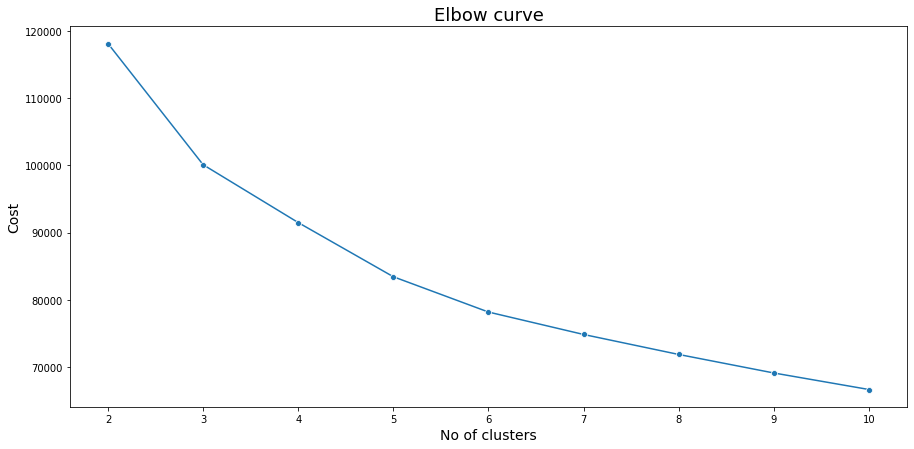

In [66]:
#Plotting the elbow curve to decide the number of clusters to be used
plt.figure(figsize=(15, 7))
ax = sns.lineplot(x=no_of_clusters, y=cost_values, marker="o", dashes=False)
ax.set_title('Elbow curve', fontsize=18)
ax.set_xlabel('No of clusters', fontsize=14)
ax.set_ylabel('Cost', fontsize=14)
plt.plot()
    

In [67]:
model_3 = KPrototypes(n_clusters=5, init='Huang', random_state=42)
model_3.fit_predict(smart_array, categorical=categorical_index)


78147.04231595385


In [71]:
df_2['labels'] = model_3.labels_